# SWIN models

3 Bands:
Total Epochs: 500
Final Epoch: 499
Train Accuracies Range: min=0.375844584985611, max=1.0
Validation Accuracies Range: min=0.4682219743325904, max=0.8528810956993619
Train Losses Range: min=2.4116219070523436e-09, max=2.0696364950287984
Validation Losses Range: min=0.503264051031422, max=1.8050245940685272


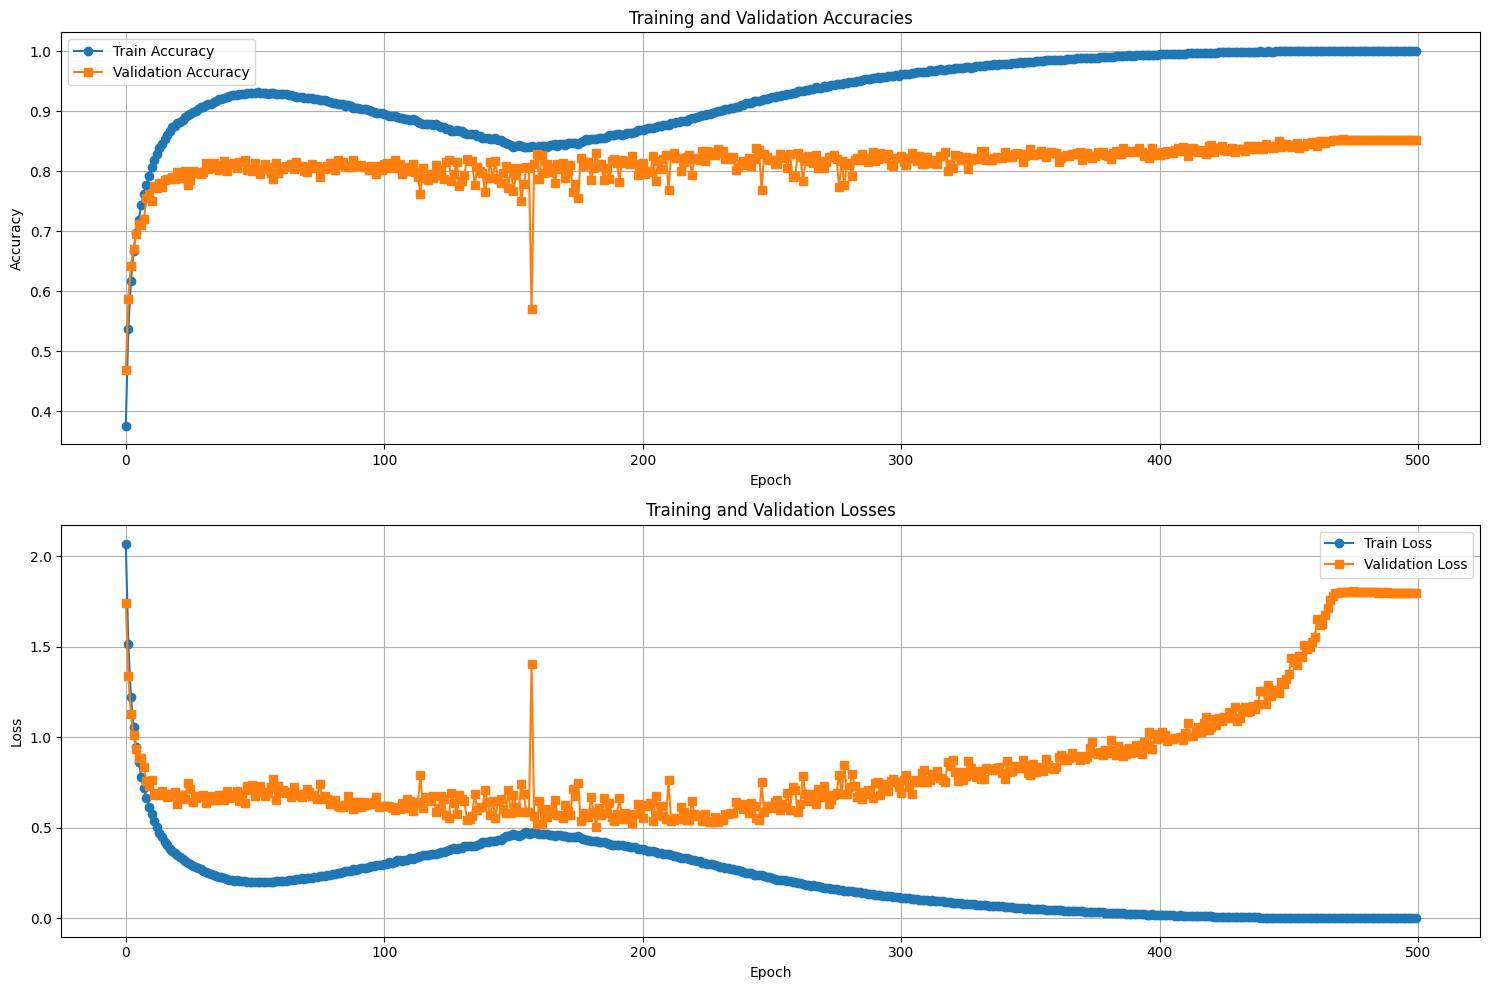

In [16]:
import re
import matplotlib.pyplot as plt

def parse_number(num_str):
    """
    Parse a number that might be in scientific notation or '1.0'
    """
    try:
        # Handle '1.0' or scientific notation
        return float(num_str.rstrip('.'))
    except ValueError:
        print(f"Warning: Could not parse number from {num_str}")
        return None

def parse_log_file(filepath):
    """
    Parse a log file and extract epoch, training loss, training accuracy, 
    validation loss, and validation accuracy.
    """
    epochs = []
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    
    with open(filepath, 'r') as file:
        for line in file:
            # Match Epoch line for training with more flexible number parsing
            epoch_match = re.search(r'\* Epoch (\d+), Training loss: ([\d.e-]+), Acc: ([\d.e-]+)\.?', line)
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))
                train_losses.append(parse_number(epoch_match.group(2)))
                train_accs.append(parse_number(epoch_match.group(3)))
            
            # Match Validation line with more flexible number parsing
            val_match = re.search(r'Validation loss: ([\d.e-]+), Acc: ([\d.e-]+)\.?', line)
            if val_match:
                val_losses.append(parse_number(val_match.group(1)))
                val_accs.append(parse_number(val_match.group(2)))
    
    return {
        'epochs': epochs,
        'train_losses': train_losses,
        'train_accs': train_accs,
        'val_losses': val_losses,
        'val_accs': val_accs
    }

def plot_training_metrics(log_data):
    """
    Create plots for training and validation metrics
    """
    plt.figure(figsize=(15, 10))

    # Accuracy Subplot
    plt.subplot(2, 1, 1)
    plt.plot(log_data['epochs'], log_data['train_accs'], label='Train Accuracy', marker='o')
    plt.plot(log_data['epochs'], log_data['val_accs'], label='Validation Accuracy', marker='s')
    
    plt.title('Training and Validation Accuracies')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Subplot
    plt.subplot(2, 1, 2)
    plt.plot(log_data['epochs'], log_data['train_losses'], label='Train Loss', marker='o')
    plt.plot(log_data['epochs'], log_data['val_losses'], label='Validation Loss', marker='s')
    
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Paths to log files
path_to_3band_log = "/home/pablo.canosa/wip/python_notebooks/Francisco Net Adaptations/log_swin_francisco_3_Bandas.log"

# Parse log file
log_3band = parse_log_file(path_to_3band_log)

# Print out parsed data for verification
print("3 Bands:")
print("Total Epochs:", len(log_3band['epochs']))
print("Final Epoch:", log_3band['epochs'][-1])
print("Train Accuracies Range:", 
      f"min={min(log_3band['train_accs'])}, max={max(log_3band['train_accs'])}")
print("Validation Accuracies Range:", 
      f"min={min(log_3band['val_accs'])}, max={max(log_3band['val_accs'])}")
print("Train Losses Range:", 
      f"min={min(log_3band['train_losses'])}, max={max(log_3band['train_losses'])}")
print("Validation Losses Range:", 
      f"min={min(log_3band['val_losses'])}, max={max(log_3band['val_losses'])}")

# Plot the metrics
plot_training_metrics(log_3band)

4 Bands:
Total Epochs: 500
Final Epoch: 499
Train Accuracies Range: min=0.44861696503987236, max=1.0
Validation Accuracies Range: min=0.5696742955494571, max=0.8666732258893348
Train Losses Range: min=2.3632938187118243e-09, max=1.7670464275052418
Validation Losses Range: min=0.45787284100377884, max=1.6681487445493002


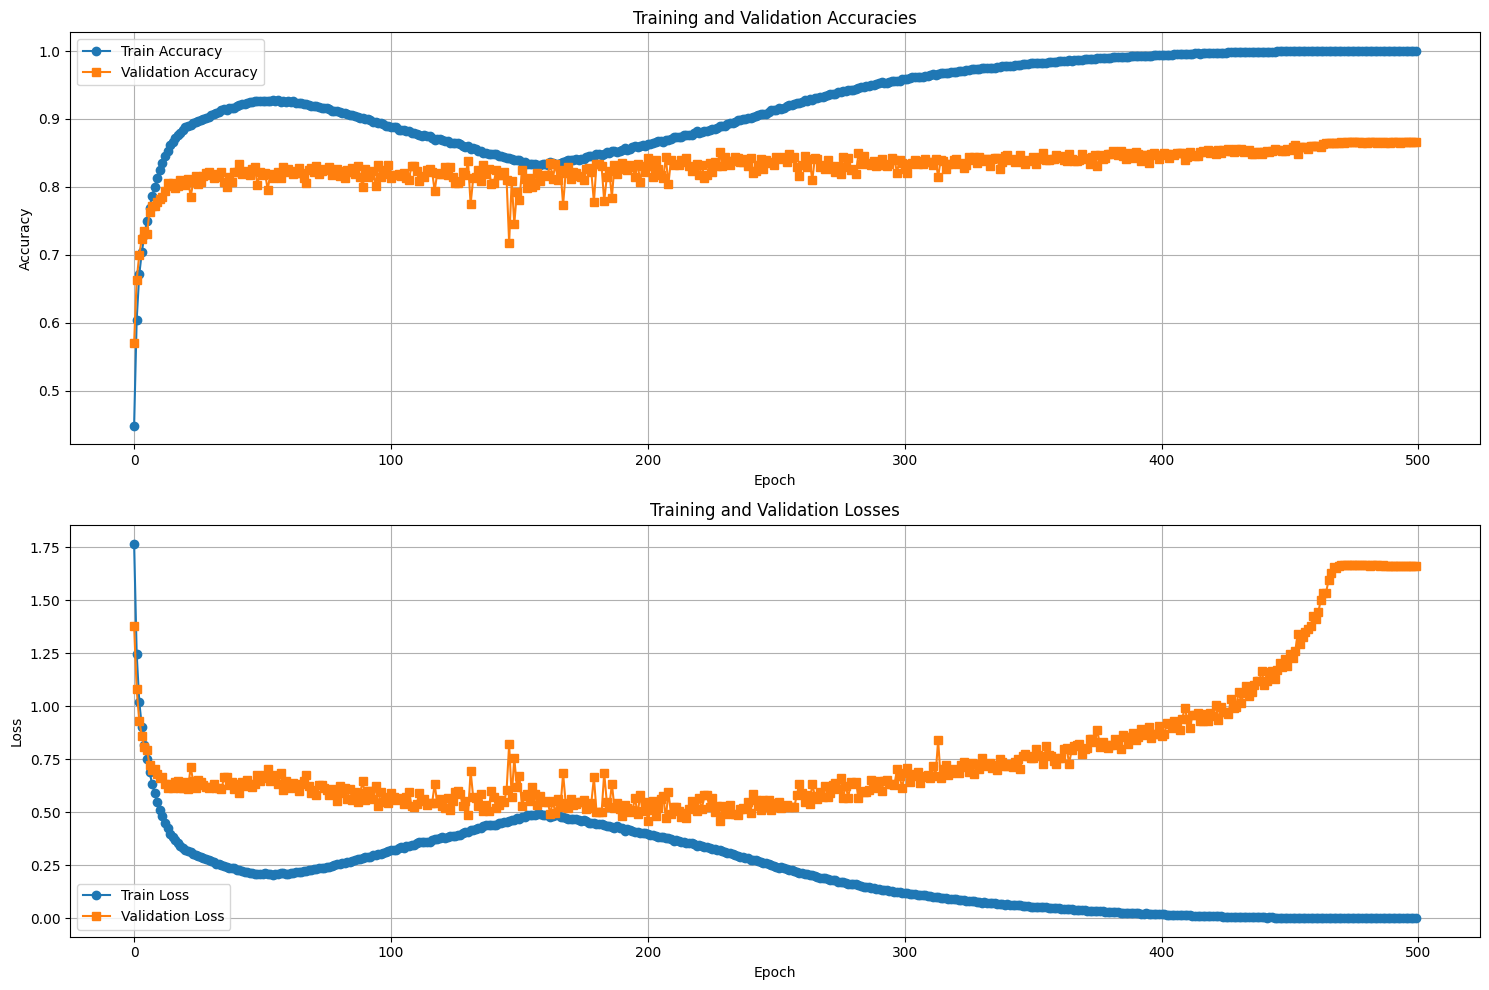

In [17]:
# Paths to log files
path_to_4band_log = "/home/pablo.canosa/wip/python_notebooks/Francisco Net Adaptations/log_swin_francisco_4_Bandas.log"

# Parse log file
log_4band = parse_log_file(path_to_4band_log)

# Print out parsed data for verification
print("4 Bands:")
print("Total Epochs:", len(log_4band['epochs']))
print("Final Epoch:", log_4band['epochs'][-1])
print("Train Accuracies Range:", 
      f"min={min(log_4band['train_accs'])}, max={max(log_4band['train_accs'])}")
print("Validation Accuracies Range:", 
      f"min={min(log_4band['val_accs'])}, max={max(log_4band['val_accs'])}")
print("Train Losses Range:", 
      f"min={min(log_4band['train_losses'])}, max={max(log_4band['train_losses'])}")
print("Validation Losses Range:", 
      f"min={min(log_4band['val_losses'])}, max={max(log_4band['val_losses'])}")

# Plot the metrics
plot_training_metrics(log_4band)

# ViT Graphs

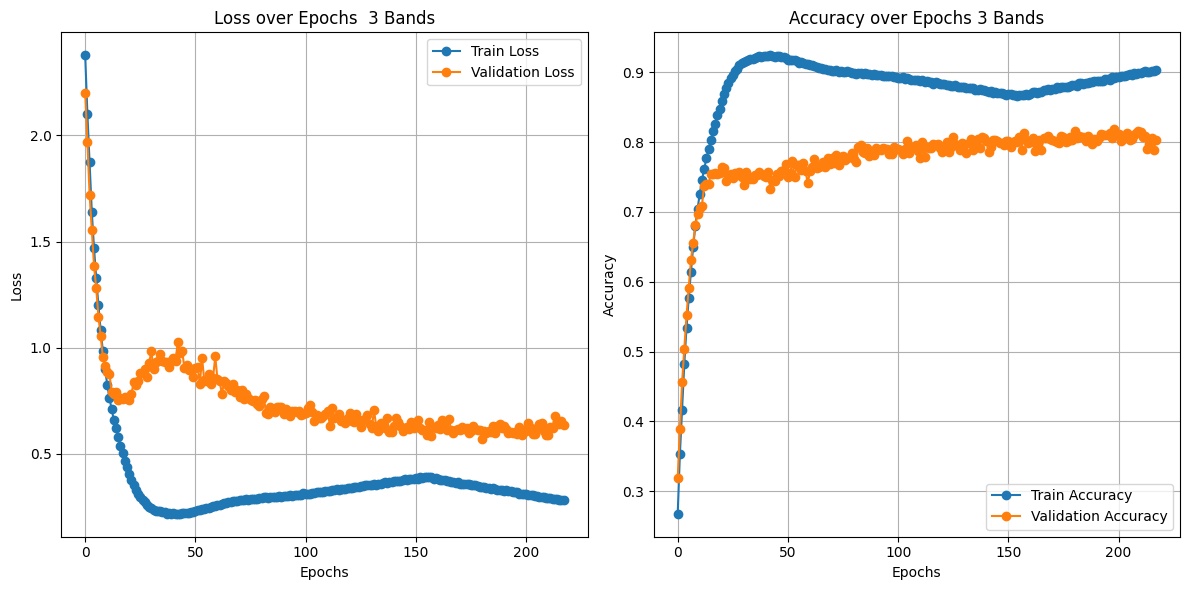

In [14]:
import matplotlib.pyplot as plt
import re

# Path to your log file
log_file_path = "/home/pablo.canosa/wip/python_notebooks/Francisco Net Adaptations/log_ViT_francisco_3_Bandas.log"

# Read the log file
with open(log_file_path, 'r') as file:
    log = file.read()

# Extract data using regex
pattern = r"\* Epoch (\d+), Train loss: ([\d.]+), Acc: ([\d.]+), Val\. loss: ([\d.]+), Acc: ([\d.]+)"
matches = re.findall(pattern, log)

# Parse extracted data
epochs = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for match in matches:
    epochs.append(int(match[0]))
    train_losses.append(float(match[1]))
    train_accuracies.append(float(match[2]))
    val_losses.append(float(match[3]))
    val_accuracies.append(float(match[4]))

# Plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs  3 Bands")
plt.legend()
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs 3 Bands")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

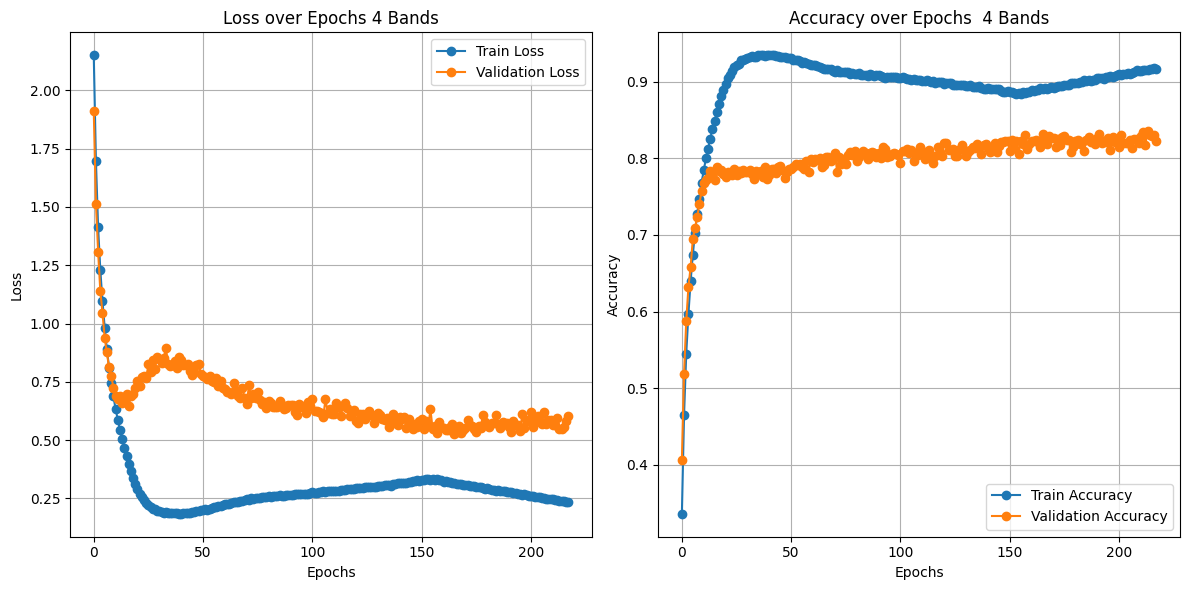

In [15]:
import matplotlib.pyplot as plt
import re

# Path to your log file
log_file_path = "/home/pablo.canosa/wip/python_notebooks/Francisco Net Adaptations/log_ViT_francisco_4_Bandas.log"

# Read the log file
with open(log_file_path, 'r') as file:
    log = file.read()

# Extract data using regex
pattern = r"\* Epoch (\d+), Train loss: ([\d.]+), Acc: ([\d.]+), Val\. loss: ([\d.]+), Acc: ([\d.]+)"
matches = re.findall(pattern, log)

# Parse extracted data
epochs = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for match in matches:
    epochs.append(int(match[0]))
    train_losses.append(float(match[1]))
    train_accuracies.append(float(match[2]))
    val_losses.append(float(match[3]))
    val_accuracies.append(float(match[4]))

# Plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs 4 Bands")
plt.legend()
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs  4 Bands")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()